# Случайный лес дял определения качества вина


In [8]:
import kagglehub
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

path = kagglehub.dataset_download("shubhamsingh42/flight-delay-dataset-2018-2024")

print("Path to dataset files:", path)
print(os.listdir(path))

df = pd.read_csv(path + '/flight_data_2018_2024.csv')

df = df[[
    'Year',
    'Month',
    'DayofMonth',
    'DayOfWeek',
    'IATA_Code_Marketing_Airline',
    'Flight_Number_Marketing_Airline',
    'IATA_Code_Operating_Airline',
    'Origin',
    'OriginCityName',
    'OriginStateName',
    'DepTime',
    'DepDelayMinutes',
    'Dest',
    'DestCityName',
    'DestStateName',
    'ArrDel15',
    'Cancelled',
    'DistanceGroup'

]]

df.head()

Using Colab cache for faster access to the 'flight-delay-dataset-2018-2024' dataset.
Path to dataset files: /kaggle/input/flight-delay-dataset-2018-2024
['flight_data.parquet', 'flight_data_2018_2024.csv', 'readme.html']


/tmp/ipython-input-344857333.py:14: DtypeWarning: Columns (11,13,86,93,94,101) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path + '/flight_data_2018_2024.csv')


,Year,Month,DayofMonth,DayOfWeek,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,IATA_Code_Operating_Airline,Origin,OriginCityName,OriginStateName,DepTime,DepDelayMinutes,Dest,DestCityName,DestStateName,ArrDel15,Cancelled,DistanceGroup
0,2024,1,14,7,UA,4432,G7,MHT,"Manchester, NH",New Hampshire,1849.0,71.0,EWR,"Newark, NJ",New Jersey,1.0,0.0,1
1,2024,1,14,7,UA,4430,G7,IAD,"Washington, DC",Virginia,814.0,0.0,EWR,"Newark, NJ",New Jersey,1.0,0.0,1
2,2024,1,14,7,UA,4429,G7,EWR,"Newark, NJ",New Jersey,1654.0,74.0,MHT,"Manchester, NH",New Hampshire,1.0,0.0,1
3,2024,1,14,7,UA,4428,G7,STL,"St. Louis, MO",Missouri,630.0,0.0,ORD,"Chicago, IL",Illinois,1.0,0.0,2
4,2024,1,14,7,UA,4427,G7,STL,"St. Louis, MO",Missouri,1333.0,33.0,IAD,"Washington, DC",Virginia,1.0,0.0,3


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np

df_model = df.copy()

df_model['DepTime'] = pd.to_numeric(df_model['DepTime'], errors='coerce')
df_model['DepDelayMinutes'] = pd.to_numeric(df_model['DepDelayMinutes'], errors='coerce')

df_model.dropna(subset=['ArrDel15'], inplace=True)

df_model['DepDelayMinutes'].fillna(df_model['DepDelayMinutes'].median(), inplace=True)
df_model['DepTime'].fillna(df_model['DepTime'].median(), inplace=True)

categorical_cols = [
    'IATA_Code_Marketing_Airline',
    'IATA_Code_Operating_Airline',
    'Origin',
    'OriginCityName',
    'OriginStateName',
    'Dest',
    'DestCityName',
    'DestStateName'
]

label_encoders = {}
for col in categorical_cols:
    df_model[col] = df_model[col].astype(str)
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

X = df_model.drop('ArrDel15', axis=1)
y = df_model['ArrDel15']

y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

print("\nBaseline Random Forest Classifier Performance:\n")
print(classification_report(y_test, y_pred))

/tmp/ipython-input-2070387326.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_model['DepDelayMinutes'].fillna(df_model['DepDelayMinutes'].median(), inplace=True)
/tmp/ipython-input-2070387326.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c


Baseline Random Forest Classifier Performance:

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     84828
           1       0.91      0.74      0.82     26915

    accuracy                           0.92    111743
   macro avg       0.92      0.86      0.88    111743
weighted avg       0.92      0.92      0.92    111743



Top 10 Feature Importances:


,Feature,Importance
11,DepDelayMinutes,0.612414
10,DepTime,0.074497
2,DayofMonth,0.054625
5,Flight_Number_Marketing_Airline,0.048777
3,DayOfWeek,0.026941
12,Dest,0.025065
13,DestCityName,0.024512
7,Origin,0.024124
8,OriginCityName,0.023784
14,DestStateName,0.020805


/tmp/ipython-input-1063727609.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(20), palette='viridis')


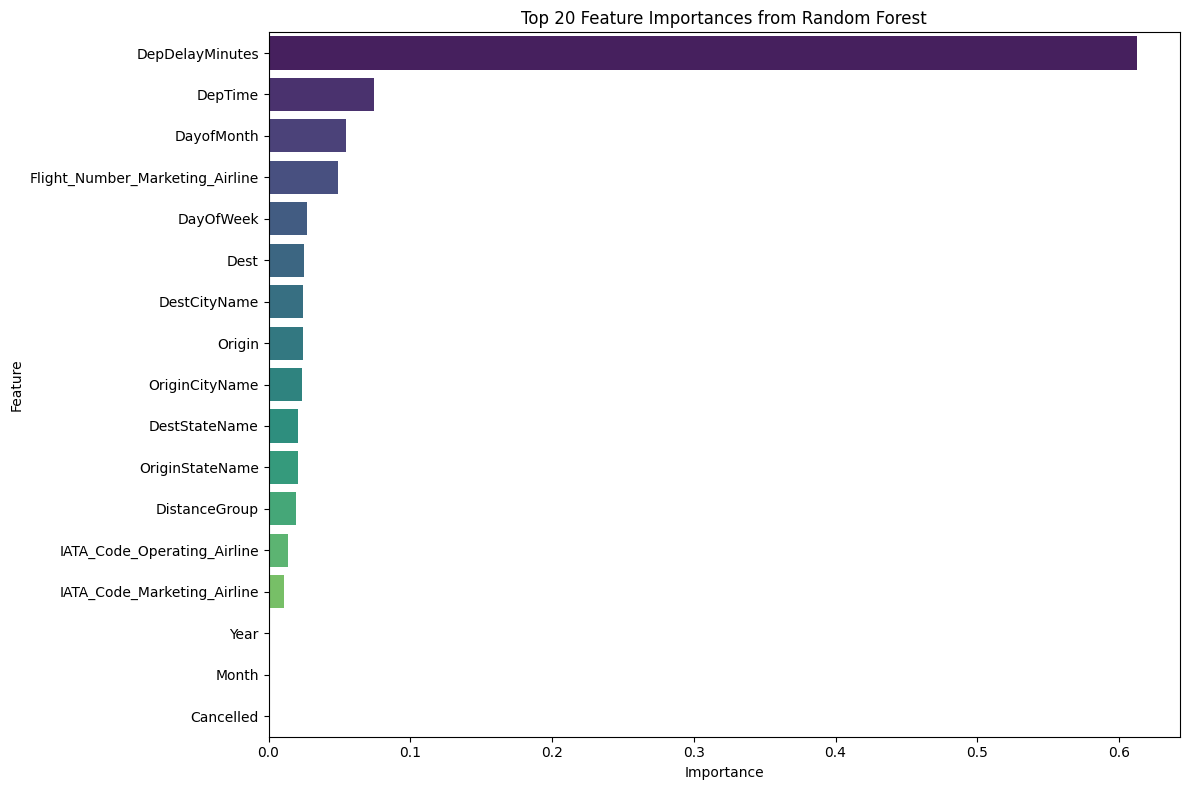

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = rf_classifier.feature_importances_

feature_names = X_train.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Top 10 Feature Importances:")
display(importance_df.head(10))

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20), palette='viridis')
plt.title('Top 20 Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Feature Engineering

Созданим новые признаки на основе существующих

In [11]:
import numpy as np

df_model['DepTime_hour'] = np.floor(df_model['DepTime'] / 100)
df_model['DepTime_minute'] = df_model['DepTime'] % 100
df_model['DepTime_float'] = df_model['DepTime_hour'] + df_model['DepTime_minute'] / 60
df_model['DepTime_sin'] = np.sin(2 * np.pi * df_model['DepTime_float'] / 24)
df_model['DepTime_cos'] = np.cos(2 * np.pi * df_model['DepTime_float'] / 24)

df_model['IsWeekend'] = df_model['DayOfWeek'].apply(lambda x: 1 if x in [6, 7] else 0)

df_model.drop(columns=['DepTime', 'DepTime_hour', 'DepTime_minute', 'DepTime_float'], inplace=True)

print("New features 'DepTime_sin', 'DepTime_cos', and 'IsWeekend' created. Original 'DepTime' related columns dropped.")
print(df_model[['DepTime_sin', 'DepTime_cos', 'IsWeekend', 'DayOfWeek']].head())

New features 'DepTime_sin', 'DepTime_cos', and 'IsWeekend' created. Original 'DepTime' related columns dropped.
   DepTime_sin  DepTime_cos  IsWeekend  DayOfWeek
0    -0.977231     0.212178          1          7
1     0.833886    -0.551937          1          7
2    -0.958820    -0.284015          1          7
3     0.991445    -0.130526          1          7
4    -0.394744    -0.918791          1          7



После создания новых признаков заново разделяем данные на обучающие и тестовые наборы, чтобы включить новые признаки в процесс обучения и оценки.


In [12]:
from sklearn.model_selection import train_test_split

# Prepare Data for Tuning (re-split after feature engineering)
X_new = df_model.drop('ArrDel15', axis=1)
y_new = df_model['ArrDel15'].astype(int)

# Split data into new training and testing sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42, stratify=y_new)

print("New features added: 'DepTime_sin', 'DepTime_cos', 'IsWeekend'")
print(f"Shape of X_train_new: {X_train_new.shape}")
print(f"Shape of X_test_new: {X_test_new.shape}")
print(f"Columns in X_train_new: {X_train_new.columns.tolist()}")

New features added: 'DepTime_sin', 'DepTime_cos', 'IsWeekend'
Shape of X_train_new: (446972, 19)
Shape of X_test_new: (111743, 19)
Columns in X_train_new: ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'IATA_Code_Marketing_Airline', 'Flight_Number_Marketing_Airline', 'IATA_Code_Operating_Airline', 'Origin', 'OriginCityName', 'OriginStateName', 'DepDelayMinutes', 'Dest', 'DestCityName', 'DestStateName', 'Cancelled', 'DistanceGroup', 'DepTime_sin', 'DepTime_cos', 'IsWeekend']


## Тюнинг Гиперпараметров

In [14]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30,
None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='f1'
)

print("Starting RandomizedSearchCV...")
random_search.fit(X_train_new, y_train_new)
print("RandomizedSearchCV completed.")
print("\nBest parameters found:", random_search.best_params_)
print("Best F1-score achieved:", random_search.best_score_)

Starting RandomizedSearchCV...
Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line

RandomizedSearchCV completed.

Best parameters found: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Best F1-score achieved: 0.8118572371076681


In [15]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=1,
    scoring='f1'
)

print("Starting RandomizedSearchCV...")
random_search.fit(X_train_new, y_train_new)
print("RandomizedSearchCV completed.")

print("\nBest parameters found:", random_search.best_params_)
print("Best F1-score achieved:", random_search.best_score_)

Starting RandomizedSearchCV...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time= 3.9min
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time= 3.9min


KeyboardInterrupt: 

In [16]:
import kagglehub
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

path = kagglehub.dataset_download("shubhamsingh42/flight-delay-dataset-2018-2024")

print("Path to dataset files:", path)
print(os.listdir(path))

df = pd.read_csv(path + '/flight_data_2018_2024.csv')

df = df[[
    'Year',
    'Month',
    'DayofMonth',
    'DayOfWeek',
    'IATA_Code_Marketing_Airline',
    'Flight_Number_Marketing_Airline',
    'IATA_Code_Operating_Airline',
    'Origin',
    'OriginCityName',
    'OriginStateName',
    'DepTime',
    'DepDelayMinutes',
    'Dest',
    'DestCityName',
    'DestStateName',
    'ArrDel15',
    'Cancelled',
    'DistanceGroup'

]]

df.head()

Using Colab cache for faster access to the 'flight-delay-dataset-2018-2024' dataset.
Path to dataset files: /kaggle/input/flight-delay-dataset-2018-2024
['flight_data.parquet', 'flight_data_2018_2024.csv', 'readme.html']


/tmp/ipython-input-2468051893.py:13: DtypeWarning: Columns (11,13,86,93,94,101) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path + '/flight_data_2018_2024.csv')


,Year,Month,DayofMonth,DayOfWeek,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,IATA_Code_Operating_Airline,Origin,OriginCityName,OriginStateName,DepTime,DepDelayMinutes,Dest,DestCityName,DestStateName,ArrDel15,Cancelled,DistanceGroup
0,2024,1,14,7,UA,4432,G7,MHT,"Manchester, NH",New Hampshire,1849.0,71.0,EWR,"Newark, NJ",New Jersey,1.0,0.0,1
1,2024,1,14,7,UA,4430,G7,IAD,"Washington, DC",Virginia,814.0,0.0,EWR,"Newark, NJ",New Jersey,1.0,0.0,1
2,2024,1,14,7,UA,4429,G7,EWR,"Newark, NJ",New Jersey,1654.0,74.0,MHT,"Manchester, NH",New Hampshire,1.0,0.0,1
3,2024,1,14,7,UA,4428,G7,STL,"St. Louis, MO",Missouri,630.0,0.0,ORD,"Chicago, IL",Illinois,1.0,0.0,2
4,2024,1,14,7,UA,4427,G7,STL,"St. Louis, MO",Missouri,1333.0,33.0,IAD,"Washington, DC",Virginia,1.0,0.0,3


### Базовая модель случайного леса

Этот код выполняет следующие шаги:
1.  **Подготовка данных**: Копирование исходного DataFrame, преобразование числовых столбцов в числовой формат и обработка пропущенных значений.
2.  **Кодирование категориальных признаков**: Использование `LabelEncoder` для преобразования категориальных столбцов в числовые представления.
3.  **Разделение данных**: Разделение данных на обучающие и тестовые наборы.
4.  **Обучение модели**: Создание и обучение классификатора `RandomForestClassifier`.
5.  **Оценка производительности**: Прогнозирование на тестовом наборе и вывод отчета о классификации.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np

df_baseline = df.copy()

# Convert relevant columns to numeric, coercing errors to NaN
df_baseline['DepTime'] = pd.to_numeric(df_baseline['DepTime'], errors='coerce')
df_baseline['DepDelayMinutes'] = pd.to_numeric(df_baseline['DepDelayMinutes'], errors='coerce')

# Drop rows where 'ArrDel15' is NaN, as it's our target variable
df_baseline.dropna(subset=['ArrDel15'], inplace=True)

# Fill remaining NaNs for numerical features with the median
df_baseline['DepDelayMinutes'].fillna(df_baseline['DepDelayMinutes'].median(), inplace=True)
df_baseline['DepTime'].fillna(df_baseline['DepTime'].median(), inplace=True)

# Define categorical columns for encoding
categorical_cols = [
    'IATA_Code_Marketing_Airline',
    'IATA_Code_Operating_Airline',
    'Origin',
    'OriginCityName',
    'OriginStateName',
    'Dest',
    'DestCityName',
    'DestStateName'
]

# Apply Label Encoding to categorical features
label_encoders_baseline = {}
for col in categorical_cols:
    # Ensure column is string type before encoding to handle potential mixed types
    df_baseline[col] = df_baseline[col].astype(str)
    le = LabelEncoder()
    df_baseline[col] = le.fit_transform(df_baseline[col])
    label_encoders_baseline[col] = le

# Define features (X) and target (y)
X_baseline = df_baseline.drop('ArrDel15', axis=1)
y_baseline = df_baseline['ArrDel15']

# Ensure target variable is integer type
y_baseline = y_baseline.astype(int)

# Split data into training and testing sets
X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(
    X_baseline, y_baseline, test_size=0.2, random_state=42, stratify=y_baseline
)

# Initialize and train the Random Forest Classifier
rf_classifier_baseline = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
rf_classifier_baseline.fit(X_train_baseline, y_train_baseline)

# Make predictions on the test set
y_pred_baseline = rf_classifier_baseline.predict(X_test_baseline)

# Print classification report
print("\nBaseline Random Forest Classifier Performance (New Run):\n")
print(classification_report(y_test_baseline, y_pred_baseline))

/tmp/ipython-input-336626783.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_baseline['DepDelayMinutes'].fillna(df_baseline['DepDelayMinutes'].median(), inplace=True)
/tmp/ipython-input-336626783.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '


Baseline Random Forest Classifier Performance (New Run):

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     84828
           1       0.91      0.74      0.82     26915

    accuracy                           0.92    111743
   macro avg       0.92      0.86      0.88    111743
weighted avg       0.92      0.92      0.92    111743

